## 什么是决策树

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

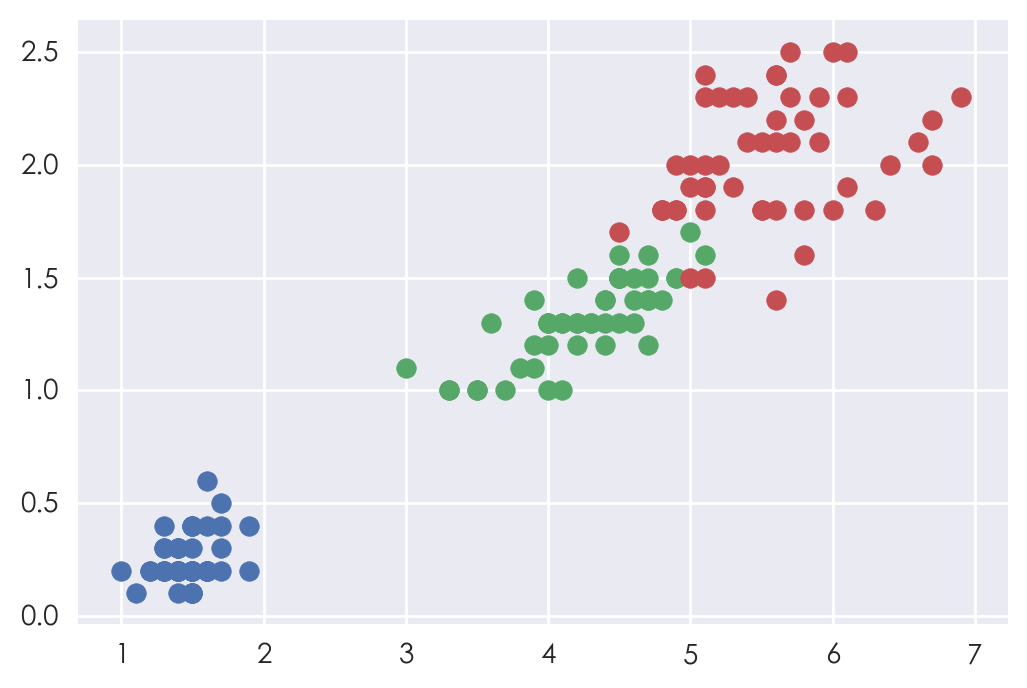

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

plt.figure(dpi=100)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(
    max_depth=2, criterion="entropy", random_state=100)
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [4]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(
            (axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(
            (axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

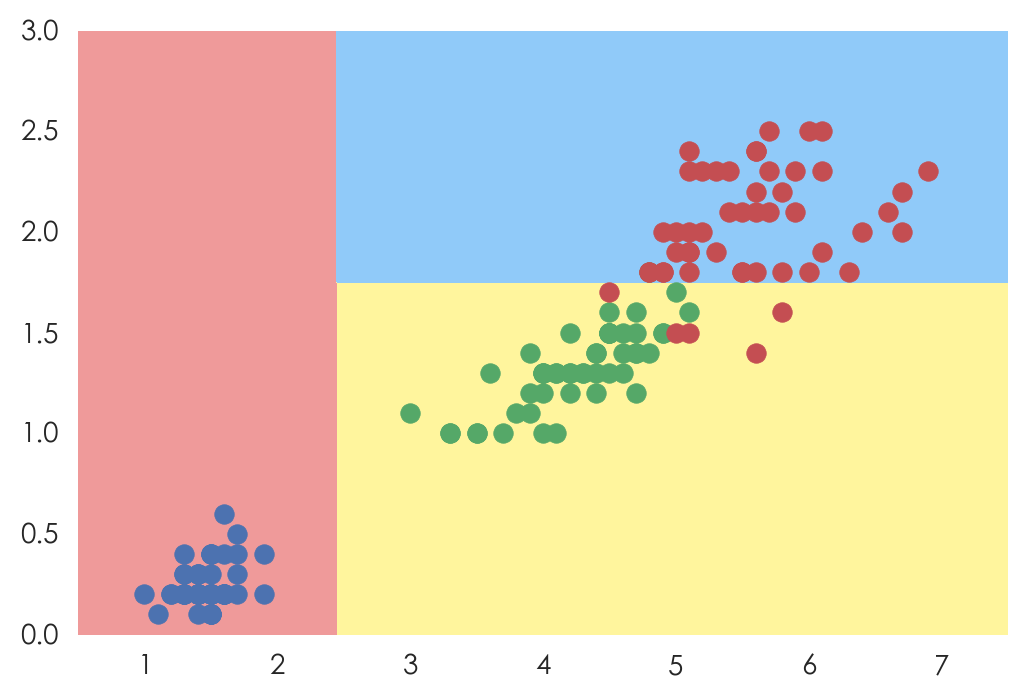

In [5]:
plt.figure(dpi=100)
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()